In [1]:
import pandas as pd
import numpy as np

In [2]:
from datetime import datetime, date
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [5]:
train.shape

(12980, 12)

In [6]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [8]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [9]:
test.shape

(4399, 11)

In [10]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [11]:
test.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
dtype: object

In [12]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [13]:
test.isnull().sum()


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

# Univariate and Bivariate Analysis

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19964\2811709529.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["count"])


<Axes: xlabel='count', ylabel='Density'>

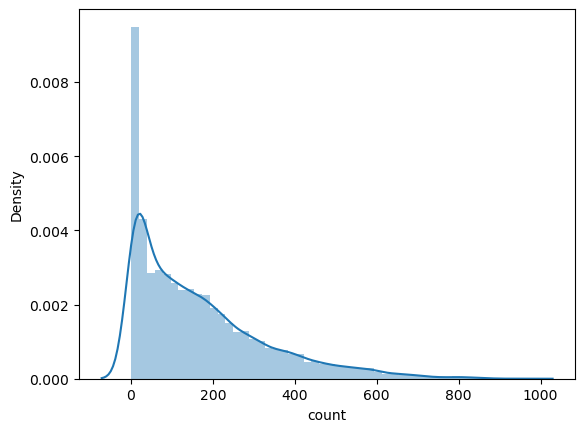

In [14]:
sns.distplot(train["count"])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19964\3368358136.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train["count"]))


<Axes: xlabel='count', ylabel='Density'>

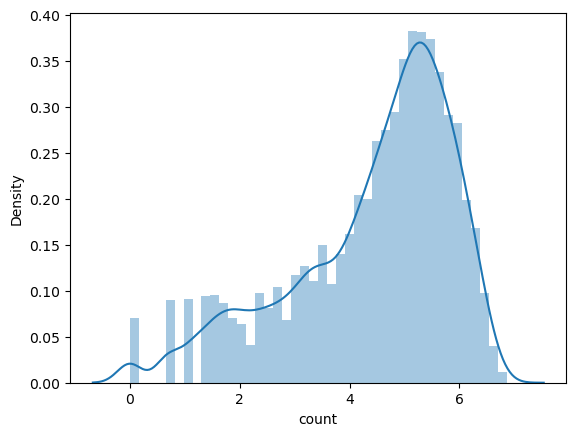

In [15]:
sns.distplot(np.log(train["count"]))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19964\369202021.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["registered"])


<Axes: xlabel='registered', ylabel='Density'>

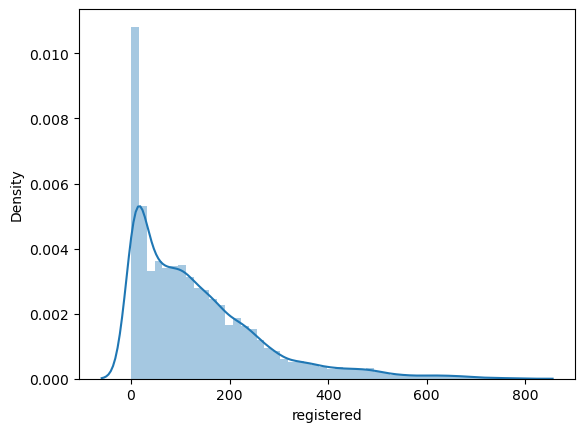

In [16]:
sns.distplot(train["registered"])

<Axes: >

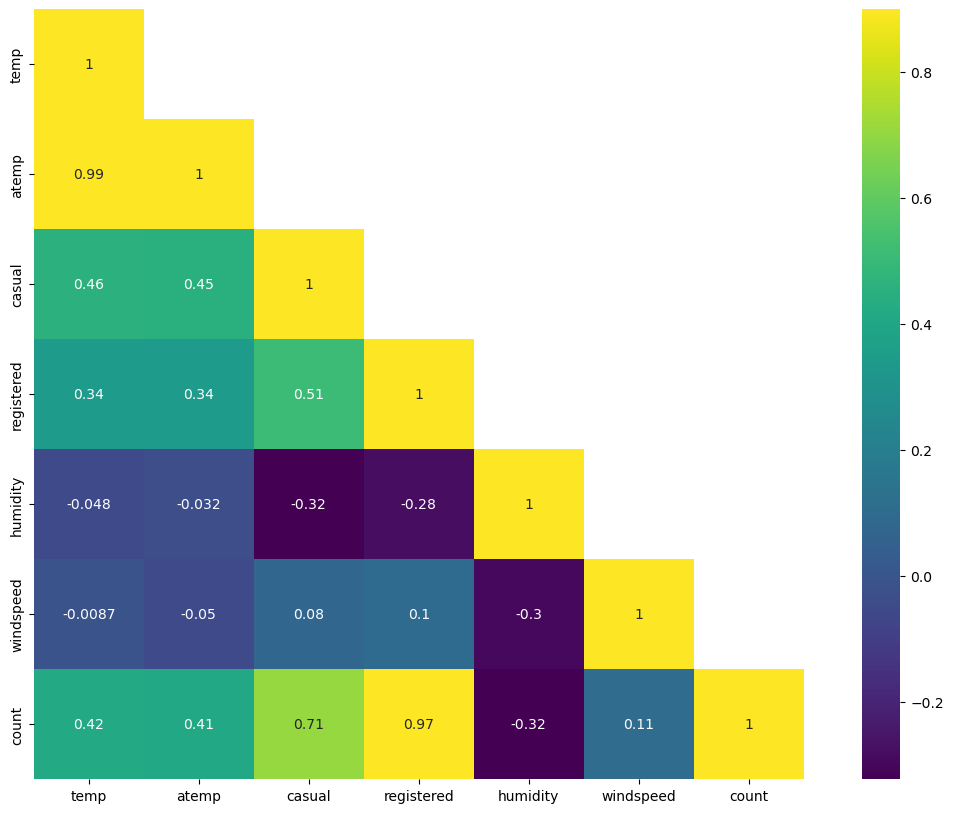

In [17]:
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
sns.heatmap(corr, mask =mask, vmax= 0.9, square = True, annot = True, cmap = "viridis")

In [18]:
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString, "%Y-%m-%d").month)

In [19]:
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString, "%Y-%m-%d").month)

In [20]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16,2011-01-01,0,1
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,2011-01-01,1,1
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,2011-01-01,2,1
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,2011-01-01,3,1
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1,2011-01-01,4,1


In [21]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,date,hour,month
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55,2012-06-30,1,6
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54,2012-06-30,2,6
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20,2012-06-30,3,6
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15,2012-06-30,4,6
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7,2012-06-30,5,6


In [22]:
training = train[train['datetime'] <= '2012-03-30 0:00:00']
validation = train[train['datetime'] > '2012-03-30 0:00:00']

In [23]:
training.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
10769,2012-03-29 20:00:00,2,0,1,1,18.86,22.725,38.0,19.9995,34,301,335,2012-03-29,20,3
10770,2012-03-29 21:00:00,2,0,1,1,18.04,21.970,44.0,19.0012,10,214,224,2012-03-29,21,3
10771,2012-03-29 22:00:00,2,0,1,1,17.22,21.210,44.0,19.0012,17,135,152,2012-03-29,22,3
10772,2012-03-29 23:00:00,2,0,1,1,17.22,21.210,47.0,19.9995,17,77,94,2012-03-29,23,3
10773,2012-03-30 0:00:00,2,0,1,1,16.40,20.455,47.0,19.9995,10,49,59,2012-03-30,0,3


In [24]:
validation.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
10774,2012-03-30 1:00:00,2,0,1,1,15.58,19.695,50.0,19.0012,6,21,27,2012-03-30,1,3
10775,2012-03-30 2:00:00,2,0,1,1,14.76,16.665,53.0,19.9995,1,6,7,2012-03-30,2,3
10776,2012-03-30 3:00:00,2,0,1,1,13.94,16.665,61.0,8.9981,0,7,7,2012-03-30,3,3
10777,2012-03-30 4:00:00,2,0,1,1,13.94,17.425,53.0,6.0032,1,1,2,2012-03-30,4,3
10778,2012-03-30 5:00:00,2,0,1,1,13.12,16.665,61.0,6.0032,0,26,26,2012-03-30,5,3


In [25]:
train = train.drop(['datetime','date', 'atemp'],axis=1)

In [27]:
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,month
0,1,0,0,1,9.84,81.0,0.0,3,13,16,0,1
1,1,0,0,1,9.02,80.0,0.0,8,32,40,1,1
2,1,0,0,1,9.02,80.0,0.0,5,27,32,2,1
3,1,0,0,1,9.84,75.0,0.0,3,10,13,3,1
4,1,0,0,1,9.84,75.0,0.0,0,1,1,4,1


In [26]:
test = test.drop(['datetime','date', 'atemp'], axis=1)

In [28]:
test.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,hour,month
0,3,0,0,3,26.24,89.0,15.0013,3,55,1,6
1,3,0,0,2,26.24,89.0,0.0000,7,54,2,6
2,3,0,0,2,26.24,89.0,0.0000,3,20,3,6
3,3,0,0,2,25.42,94.0,0.0000,3,15,4,6
4,3,0,0,1,26.24,89.0,11.0014,3,7,5,6


In [29]:
training = training.drop(['datetime','date', 'atemp'],axis=1)

In [30]:
training.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,month
0,1,0,0,1,9.84,81.0,0.0,3,13,16,0,1
1,1,0,0,1,9.02,80.0,0.0,8,32,40,1,1
2,1,0,0,1,9.02,80.0,0.0,5,27,32,2,1
3,1,0,0,1,9.84,75.0,0.0,3,10,13,3,1
4,1,0,0,1,9.84,75.0,0.0,0,1,1,4,1


In [31]:
validation = validation.drop(['datetime','date', 'atemp'],axis=1)

In [32]:
validation.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,month
10774,2,0,1,1,15.58,50.0,19.0012,6,21,27,1,3
10775,2,0,1,1,14.76,53.0,19.9995,1,6,7,2,3
10776,2,0,1,1,13.94,61.0,8.9981,0,7,7,3,3
10777,2,0,1,1,13.94,53.0,6.0032,1,1,2,4,3
10778,2,0,1,1,13.12,61.0,6.0032,0,26,26,5,3


# Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression

In [56]:
#Initialize the linear Regression Model
LR = LinearRegression()

In [57]:
training.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,month
0,1,0,0,1,9.84,81.0,0.0,3,13,16,0,1
1,1,0,0,1,9.02,80.0,0.0,8,32,40,1,1
2,1,0,0,1,9.02,80.0,0.0,5,27,32,2,1
3,1,0,0,1,9.84,75.0,0.0,3,10,13,3,1
4,1,0,0,1,9.84,75.0,0.0,0,1,1,4,1


In [44]:
X_train = training.drop(['count'], axis = 1)


In [48]:
X_train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,hour,month
0,1,0,0,1,9.84,81.0,0.0,3,13,0,1
1,1,0,0,1,9.02,80.0,0.0,8,32,1,1
2,1,0,0,1,9.02,80.0,0.0,5,27,2,1
3,1,0,0,1,9.84,75.0,0.0,3,10,3,1
4,1,0,0,1,9.84,75.0,0.0,0,1,4,1


In [45]:
y_train = np.log(training['count'])

In [49]:
y_train.head()

0    2.772589
1    3.688879
2    3.465736
3    2.564949
4    0.000000
Name: count, dtype: float64

In [46]:
X_val = validation.drop(['count'], axis = 1)

In [50]:
X_val.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,hour,month
10774,2,0,1,1,15.58,50.0,19.0012,6,21,1,3
10775,2,0,1,1,14.76,53.0,19.9995,1,6,2,3
10776,2,0,1,1,13.94,61.0,8.9981,0,7,3,3
10777,2,0,1,1,13.94,53.0,6.0032,1,1,4,3
10778,2,0,1,1,13.12,61.0,6.0032,0,26,5,3


In [47]:
y_val = np.log(validation['count'])

In [52]:
y_val.head()

10774    3.295837
10775    1.945910
10776    1.945910
10777    0.693147
10778    3.258097
Name: count, dtype: float64

In [53]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((10774, 11), (10774,), (2206, 11), (2206,))

In [58]:
LR.fit(X_train, y_train)

LinearRegression()

In [59]:
prediction = LR.predict(X_val)

In [62]:
def rmsle_1(y, y_):
    y = np.exp(y),
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v+1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v+1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [64]:
rmsle_1(y_val, prediction)

0.8875379204281816

# Decision Tree


In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
DTR = DecisionTreeRegressor(max_depth = 5)

In [67]:
DTR.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [68]:
y_pred = DTR.predict(X_val)

In [69]:
rmsle_1(y_val, y_pred)

0.17102267399446927

In [70]:
test_pred = DTR.predict(test)

In [71]:
final_pred = np.exp(test_pred)

In [72]:
submission = pd.DataFrame()

In [73]:
submission['count'] = final_pred

In [74]:
submission.head()

,count
0,67.337495
1,67.337495
2,22.218489
3,14.518412
4,8.652763


In [75]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4399 entries, 0 to 4398
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   4399 non-null   float64
dtypes: float64(1)
memory usage: 34.5 KB


In [76]:
submission.to_csv('submission.csv',index = False, header = True)